# Context

I'm Dan — trained in physical oceanography, experienced in state-space modeling, finite difference methods, and data science, but new to investment theory. I'm working through Chris Bemis's *Portfolio Statistics and Optimization* (August 2023) to build understanding.

**Book structure**: Chapters are split into separate dialogs (ch_1.ipynb, ch_2.ipynb, etc.). Also available:
- `./spoiler.md` — short digest of each chapter's point and how they form the book's arc
- `./bib.ipynb` — bibliography

**Arc**: The book builds from statistical foundations (distributions, covariance) through regression and optimization theory to Mean-Variance Optimization and coherent risk measures. Chris emphasizes using CAPM and Fama-French as *interpretive* tools rather than prescriptive models, given non-stationarity and fat tails in real markets.

**Ch 1 covered**: EMH, systemic vs idiosyncratic risk, CAPM (β as market sensitivity, α as excess return), Fama-French (adding size and value factors), and MVO setup. Key theme: models are useful for interpretation and comparison, but their stationarity assumptions are violated in practice.

**Ch 2 covered**: CDFs, PDFs, moments (mean, variance, skew, kurtosis), percentiles. Normal, log-normal, and Student *t* distributions — with emphasis on how real equity returns exhibit fat tails and asymmetry that the normal badly misses (837,128× underestimate of 6σ events!). Student *t* with ν=5 is a pragmatic alternative. Multivariate extensions (joint distributions, covariance matrices, independence). Weak Law of Large Numbers, Central Limit Theorem, and unbiased estimators.

**Key Ch 2 insight**: Two toy models illustrate diversification. Model 1 (iid returns) suggests you can diversify away *all* risk. Model 2 (returns = β×market + idiosyncratic) shows you can only diversify away idiosyncratic risk — systematic risk remains. This motivates the passive investing view ("just own the market") and sets up the question: what justifies active management?

**My approach**: I'm comfortable with the calculus and linear algebra; I'm here for the finance intuition and the book's arc toward coherent risk measures. I skipped the Ch 2 exercises (PDF integration drills) since later chapters use distributions as tools rather than deriving them.

And reading over the above context note I just saw that iid returns can diversify away risk because the returns are, well, independent -- uncorrelated. Averaging over (totalling over) all the "errors" and they cancel out. The second model really says the same thing: variance of $\beta m+\epsilon$ _can't_ go to zero, unless var($m$) does: all the movement is _perfectly_ correlated in $\beta m$. 

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Exactly right. In Model 1, when you average *n* iid returns, the variance scales as σ²/n → 0. The errors are independent, so they wash out.

In Model 2, write the portfolio return as β̄m + ε̄ (averaging over assets). The ε̄ term still vanishes as n grows — same logic. But var(β̄m) = β̄²var(m), which doesn't shrink with n at all. The market factor is the common driver; you can't diversify away what everyone shares.

This is the statistical backbone of the "just own the market" argument: if systematic risk is the only risk you're paid for (because idiosyncratic risk can be diversified away for free), why not hold the market portfolio and collect that premium?

Which sets up the tension the book will return to: if passive is so compelling, what's the case for active management? Any initial intuitions on that before we hit Chapter 3?

## Chapter 3

## Covariance

Ellipsoidal distributions like the multivariate normal and Student  $t$  distribution play a pivotal role in modeling financial data and at their heart is the covariance matrix,  $\Sigma$. In this chapter, we discuss some key properties, empirical observations, and current research work.

The structure of the covariance matrix defines a language for the pairwise relationships in the market. We identify the mathematical framework for understanding correlation and covariance—namely the inner product—and utilize Cauchy-Schwarz to provide bounds on the former. We will also briefly discuss the relationship between correlation and independence and give an example regarding the normal distribution. Additional results follow from our interpretation of covariance as an inner product on the space of identified random variables including another Capital Asset Pricing Model (CAPM) vignette.

Some background in the theory of eigenvalues and eigenvectors for a general  $N \times N$  matrix, and results specific to positive definite matrices are necessary. With regards to covariance matrices, we relate the sum of eigenvalues to what we define as total variance, and define the square root of a positive definite matrix and relate this result to Monte Carlo simulations, as alluded to in the previous chapter. Finally, we introduce the concept of the condition number and provide some motivation for its value.

Is condition number the same as rank?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

No, they're different concepts:

- **Rank**: How many linearly independent rows/columns. An n×n covariance matrix with rank < n is singular — some asset is a perfect linear combination of others.

- **Condition number**: κ = λ_max / λ_min (for positive definite matrices). It measures how much small input errors get amplified when you invert the matrix.

A matrix can be full rank (invertible) but still have a huge condition number if the eigenvalues span many orders of magnitude. That's the dangerous case in portfolio optimization: technically you *can* invert Σ, but tiny estimation errors in your covariance estimates blow up into wild portfolio weights.

Does that distinction make sense? The chapter will likely connect this to why sample covariance matrices become ill-conditioned when the number of assets approaches the number of observations.

Right, they are related in my mind because the limit case of large condition number is rank reduction. Do you buy that?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Yes, I buy that completely. As λ_min → 0 with λ_max fixed, κ → ∞, and in the limit you hit singularity (rank drops). So ill-conditioning is the continuous approach toward rank deficiency.

Practically, a near-singular covariance matrix and a truly singular one cause the same headache: your optimizer either blows up or produces nonsense weights. The numerical distinction matters less than the fact that you're in trouble either way.

My linear algebra experience was mostly SVD focused. Eigenvalues/vectors are the same for the n*n case (and $U=V$)?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Not for general square matrices, but yes for symmetric positive definite matrices — which covariance matrices are.

For a symmetric matrix A:
- Eigendecomposition: A = QΛQᵀ (Q orthogonal, Λ diagonal with eigenvalues)
- SVD: A = UΣVᵀ

When A is symmetric PD, the eigenvalues are all positive, so they equal the singular values, and U = V = Q. The decompositions collapse to the same thing.

So for covariance matrices specifically, your SVD intuition transfers directly.

Empirical examples of the covariance matrix will center around the frequency of observed eigenvalues for a correlation matrix at a given time for a large number of equities. These observations will echo the literature and can be summarized as follows: the largest eigenvalue explains an inordinate amount of total variance, and its associated eigenvector (read eigenportfolio) is a proxy for the market as such, giving credence to the simple CAPM model; several other eigenvalues are related to sector specific drivers, and are fairly large as well; and a bulk of eigenvalues are near zero and have characteristics of a random distribution.

So the small-eigenvalue assets (the ones left when you take out the dominant eigenportfolio and the clear sectors) are all uncorrelated and you could build a near-zero variance portfolio from them?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Close, but a subtle correction: the small eigenvalues correspond to *eigenvectors* (linear combinations of assets), not individual assets. So yes, those eigenportfolios have near-zero variance.

But here's the trap: the text says those small eigenvalues "have characteristics of a random distribution" — that's a reference to random matrix theory. When you estimate Σ from finite samples, many of those tiny eigenvalues are pure noise, not real structure.

So if you construct a portfolio along those low-variance eigenvectors, you're likely fitting to estimation artifacts. The directions will reshuffle completely with new data.

This is exactly why ill-conditioning bites you in optimization: inverting Σ means dividing by those tiny (noisy) eigenvalues, amplifying garbage.

So you could build a portfolio with $\sigma$ fluctuating at small values and returns $\mu$ probably fluctuating close to zero too.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Right. Low variance *and* low expected return — no free lunch hiding in the noise. You're essentially betting on estimation artifacts that reshuffle next period.

This connects back to Ch 2's punchline: systematic risk (the big eigenvalue, the market) is what you get compensated for. The small-eigenvalue directions aren't a real low-risk opportunity; they're statistical ghosts.

Finally, we will present the theory of copulas, an essential tool for imposing a covariance structure given a set of prescribed marginals. Our work here is not extensive, but should provide the practitioner with the theory and tools for implementation. We provide a few words of caution, however, related to the application of the method and some of its shortcomings during, say, the financial crisis of 2008.

### 3.1 Covariance and Correlation

As before (2.20) we define the covariance of a random variable  $X \in \mathbb{R}^N$  with expectation  $\mu$  as

$$\text{Cov}(X) = \mathbb{E}((X - \mu)(X - \mu)')$$

giving an  $N \times N$  real valued matrix in the case where  $\text{Cov}(X)$  is defined, and we denote the  $(i, j)$  component of  $\text{Cov}(X)$  as  $\sigma_{ij}$ , and  $\sigma_{ii} = \text{Var}(X_i)$ .

In particular, for two real valued random variables,  $X$  and  $Y$ , we may introduce the notation  $\text{Cov}(X, Y)$  where

$$\text{Cov}(X, Y) = \mathbb{E}((X - \mu_X)(Y - \mu_Y)) \tag{3.1}$$

with  $\mu_X$  and  $\mu_Y$  being the expectation of  $X$  and  $Y$ , respectively. Relating this notation to the previous lines, we have

$$\text{Cov}(X, Y) = \sigma_{XY}.$$

It follows that there exists some  $\rho_{XY}$  such that,

$$\sigma_{XY} = \rho_{XY} \sigma_X \sigma_Y.$$

That is, the covariance between two random variables may be written as some scalar times the product of their standard deviations.

Far from being arbitrary,  $\rho_{XY}$  is a highly interpretable parameter called the *correlation* between  $X$  and  $Y$ . It is a measure of linear dependence, and is bounded between

$$-1 \le \rho_{XY} \le 1,$$

with the extremes being special cases in the relationship between  $X$  and  $Y$ .

To derive the above, we identify covariance as an *inner product*. For our purposes, we consider an inner product  $(\cdot, \cdot)$  to be a function of the cross product of a real valued vector space,  $V$ , over  $\mathbb{R}$  into  $\mathbb{R}$ ,

$$(\cdot, \cdot) : V \times V \to \mathbb{R}$$

satisfying the following criteria for  $X, Y, Z \in V$ , and  $a, b \in \mathbb{R}$ :

- *symmetry*

$$(X, Y) = (Y, X) \tag{3.2}$$

- *bilinearity*

$$\begin{aligned} (aX, Y) &= a(X, Y) \\ (X + Y, Z) &= (X, Z) + (Y, Z) \end{aligned} \tag{3.3}$$

- *non-negativity*

$$(X, X) \ge 0 \quad (3.4)$$

with equality only if  $X \equiv 0$ .

The definition also implies that for scalars  $\{a_i\}_i$  and  $\{b_j\}_j$ , and  $\{X_i\}_i$  and  $\{Y_j\}_j$  in  $V$ ,

$$\left(\sum_i a_i X_i, \sum_j b_j Y_j\right) = \sum_i a_i \sum_j b_j (X_i, Y_j).$$

This is left to the reader as an exercise.

**Example 3.1.1.** For  $V = \mathbb{R}^N$ , and  $A \in \mathbb{R}^{N \times N}$ ,

$$(x, y)_A = x' A y$$

is an inner product when  $A$  is symmetric and positive definite. This immediately follows by checking the criteria of the definition. We have

$$\begin{aligned} (x, y)_A &= x' A y \\ &= (x' A y)' \\ &= y' A' x \\ &= y' A x, \end{aligned}$$

and for  $a \in \mathbb{R}$ ,

$$\begin{aligned} (ax, y)_A &= ax' A y \\ &= a(x, y)_A \end{aligned}$$

and

$$\begin{aligned} (x + y, z)_A &= (x + y)' A z \\ &= x' A z + y' A z. \end{aligned}$$

Finally  $(x, y)_A$  is positive definite exactly when  $A$  is positive definite.

We may consider the vector space of real valued random variables over  $\mathbb{R}$ . As in (2.25), we have

$$\operatorname{Cov}(X, Y) = \mathbb{E}((X - \mu_X)(Y - \mu_Y)).$$

We have already shown in (2.21) that the expectation operator is linear, so that we have

$$\begin{aligned} \operatorname{Cov}(aX, Y) &= \mathbb{E}(a(X - \mu_X)(Y - \mu_Y)) \\ &= a\mathbb{E}((X - \mu_X)(Y - \mu_Y)) \\ &= a\operatorname{Cov}(X, Y). \end{aligned}$$

Similarly,  $Cov(\cdot, \cdot)$  is symmetric and bilinear.

We are left to show non-negativity. We have, clearly, that

$$Cov(X, X) = Var(X),$$

and we know that variance is a nonnegative number. In fact, looking at the definition of variance in (2.5), we see that the quantity is only zero when  $X \equiv \mu_X$ . That is,  $Var(X) = 0$  if and only if  $X$  is a constant random variable. This gives that covariance is an inner product on the space of real valued random variables over  $\mathbb{R}$  where constants are identified. We call such a space where a particular relation defines an identification a *quotient space*.

We may also identify when the covariance matrix of  $X \in \mathbb{R}^N$  is positive definite. We have shown already that

$$Var(w'X) = Cov(w'X, w'X) = w'\Sigma w.$$

Hence  $\Sigma$  is positive definite only if  $Var(w'X) = 0$  implies  $w'X$  is a constant. We will say that the random variable  $X$  is *linearly independent*, if  $w'X = c$ , a constant, implies  $w \equiv 0$ . From this discussion, then,  $\Sigma$  is positive definite if and only if  $X$  is linearly independent.

As we shall soon see, this criterion is easily violated when constructing the sample covariance (i.e., an unbiased estimator of  $\Sigma$  from data). Consider the case of  $N$  assets and  $T$  observations. Whenever  $N > T$ , we will obtain semidefinite sample covariance matrices as our system is underdetermined. Other issues arise and we will get to them shortly.

With the proof that  $Cov(\cdot, \cdot)$  is an inner product on the quotient space of real random variables in hand, we are ready to discuss correlation. The *Cauchy-Schwarz inequality* states that for an inner product  $(\cdot, \cdot)$ ,

$$|(u, v)| \le ||u|| \cdot ||v||, \tag{3.5}$$

with equality only if  $u = av$  for  $a$  a scalar, and where

$$||u||^2 = (u, u) \tag{3.6}$$

is defined as the *norm* of  $u$  induced by the inner product  $(\cdot, \cdot)$ . The proof of the Cauchy-Schwarz inequality is in the appendix.

In general, a norm is a function  $||\cdot||: V \to \mathbb{R}_+$  satisfying, for all  $X, Y \in V$ , and scalars  $a$ ,

- *absolute scalability*

$$||aX|| = |a| \cdot ||X|| \tag{3.7}$$

- *the triangle inequality*

$$||X + Y|| \le ||X|| + ||Y|| \tag{3.8}$$

- *non-negativity*

$$||X|| \ge 0 \tag{3.9}$$

with equality only in the case that  $X \equiv 0$ .

We leave the proof that  $||\cdot||^2 = (\cdot, \cdot)$  defines a norm to the reader.  
From the above, utilizing (3.5) we have that

$$|Cov(X, Y)| \le \sqrt{Cov(X, X)} \sqrt{Cov(Y, Y)} \\ = Var(X) \cdot Var(Y),$$

or in the previous notation

$$|\sigma_{XY}| \le \sigma_X \sigma_Y.$$

We may therefore define the *correlation between X and Y* as

$$\rho_{XY} = \frac{\sigma_{XY}}{\sigma_X \sigma_Y}. \quad (3.10)$$

We may write  $Corr(X, Y) = \rho_{XY}$  to emphasize the role of correlation as an operator. As one of the consequences of Cauchy-Schwarz, we know further that

$$-1 \le \rho_{XY} \le 1$$

with equality only in the case that  $X = aY$  for some  $a$  in the quotient space of random variables over  $\mathbb{R}$ .

We say two random variables are positively (negatively) correlated if their correlation coefficient,  $\rho$ , is positive (negative). In the case that correlation is zero, we say that these random variables are *uncorrelated*. Notice, too, that correlation is dimensionless (whereas volatility has the dimensions of the original random variable). Finally, correlation is a measure of linear dependence as we shall see in the next example which revisits a version of CAPM once more.

**Example 3.1.2.** Consider the model

$$r = \beta m + \epsilon$$

where  $m$ , and  $\epsilon$  are each random variables in  $\mathbb{R}$  satisfying

$$Cov(m, \epsilon) = 0 \\ Var(\epsilon) = \sigma_\epsilon^2 \\ Var(m) = \sigma_m^2.$$

Letting  $(\cdot, \cdot)$  denote  $Cov(\cdot, \cdot)$ , we may take the inner product of both sides with respect to  $m$  and obtain

$$(r, m) = \beta(m, m) + (\epsilon, m),$$

where we have used the bilinearity of the inner product on the right hand side. Simplifying based on our assumptions, we have

$$(r, m) = \beta(m, m),$$

or,

$$\frac{\sigma_{r,m}}{\sigma_m^2} = \beta$$

which yields

$$\beta = \rho \frac{\sigma_r}{\sigma_m} \quad (3.11)$$

with  $\rho$  the correlation between  $r$  and  $m$.

The preceding model is the core definition of the Capital Asset Pricing Model. Notice that we haven't *estimated* any of these quantities or validated their applicability. Rather, we began with a model and obtained a consequence of our assumptions. Adding interpretation to assumptions,  $r$  represents a particular stock's returns,  $m$  the market's (whatever that may be) returns, and  $\epsilon$  the so-called idiosyncratic component of that stock.

The model says, then, that stock returns have a linear relationship with the market's returns, with some variation defined by  $\epsilon$ . Notice that we have not as yet prescribed a distribution for  $\epsilon$. We will. When we do, this will limit the scope of the model but open us to more interpretation and analysis.

We also have not discussed the relationship between multiple assets under the model. This too will come, but the astute reader can likely derive the consequences now by generalizing the above and applying the term idiosyncratic appropriately.

I guess I'm not astute. But the more correlated multiple assets are to each other, the more they are $m$ and not $\epsilon$. 

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Exactly right. If each asset follows r_i = β_i m + ε_i with the ε_i uncorrelated across assets (that's what "idiosyncratic" means), then any correlation between assets *must* come through m.

Try computing Cov(r_i, r_j) under those assumptions — you'll see that shared movement is entirely β_i β_j σ_m². The market factor *is* the correlation structure.

This also closes the loop on the eigenvalue discussion: that dominant eigenvector (the "market eigenportfolio") is capturing exactly this shared β·m component across all assets.

The above example highlights some of the features of a model based on CAPM. In addition, we saw in (3.11) that  $\beta$ , the linear coefficient of the model, was a scalar multiple of  $\rho$ , clearly establishing that correlation is a measure of linear dependence between two random variables. It is important to point out, then, that in practice, observations of small correlation (in absolute value) do not preclude a strong relationship between two random variables; viz., a near perfect quadratic relationship may exist with a close to zero correlation.

If both branches of the parabola are relevant. In the domain of interest, two assets could measure uncorrelated if they are strongly correlated half the time and strongly anticorrelated half the time. 

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Exactly — correlation averages over your sample. Two assets that alternate between ρ ≈ +1 and ρ ≈ −1 across regimes could show ρ ≈ 0 overall, completely masking the strong (but switching) dependence.

This is one reason correlations famously "break down" in crises: assets that seemed uncorrelated in calm markets suddenly move together. The relationship was always there — it was just hiding in a different regime.

Likely connects to the copula warning about 2008 that's coming up.

I'm not sure that's what I mean. If pre-crisis, things look weakly correlated, that could just be because I didn't pay attention to notice they are corr'd in some pre-crisis subintervals and anti-corr'd in others. The crisis "breakdown" you're describing is one where assets whose movements were never coordianted suddenly are. Or for a quadratic example, history hung out near the vertex until some crisis pushed us up one branch. 

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

You're right, I conflated two different things:

1. **Averaging artifact**: Correlation looks small because you're mixing intervals of strong positive and strong negative dependence. The structure was always there — you just didn't slice the data finely enough.

2. **True regime change**: Assets genuinely had no coordinated movement, then a crisis pushes the system into a region of the joint distribution you'd never sampled. The parabola example: history sat near the vertex (flat, uncorrelated), then crisis moved you up a branch where the relationship bites.

The second is the scarier one for risk models — your historical data simply didn't contain information about where you now find yourself.

But Chris's parabola example is really illustrating the first. Yes?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Yes. If Y = X² and X is symmetric around zero, then Cov(X,Y) = E[X³] = 0. Perfect functional dependence, zero correlation — because the positive and negative branches cancel in the average.

It's a mathematical illustration of case 1: correlation is blind to structure that "averages out."

We have already seen an unbiased estimator of variance (2.43). For covariance, we have that

$$\hat{\sigma}_{XY} = \frac{1}{N-1} \sum_{i=1}^{N} (X_i - \hat{\mu}_X)(Y_i - \hat{\mu}_Y) \quad (3.12)$$

is an unbiased estimator as well (this is left as an exercise). An estimate of correlation can be obtained from these estimators by replacing population with sample moments in (3.10); viz.,

$$\hat{\rho}_{XY} = \frac{\hat{\sigma}_{XY}}{\hat{\sigma}_X \hat{\sigma}_Y}. \quad (3.13)$$

In general, the above technique is called the *method of moments*, and for our purposes can be summarized as an estimator which equates sample moments to population moments in a formula for a given distribution parameter.

**Example 3.1.3.** The method of moments estimator of variance is

$$s_{m,N}^2 = \frac{1}{N} \sum_{i=1}^{N} (X_i - \hat{\mu})^2,$$

which we know from (2.43) is a biased estimator. Even so, it is a *consistent estimator*; i.e.,

$$s_{m,N}^2 \to \sigma^2$$

in probability.

The above example shows that a method of moments estimator may be biased (and likely is so), but consistent (and again, under light constraints likely is so). The correlation estimator presented here is both biased and consistent.

A method of moments estimator for  $\beta$  in the CAPM model above is given by

$$\hat{\beta} = \hat{\rho} \frac{\hat{\sigma}_r}{\hat{\sigma}_m}. \quad (3.14)$$

We shall see in our work on ordinary least squares (OLS) that this is exactly the OLS estimate of  $\beta$ , and that it is in fact unbiased as well.

![CAPM  $\beta$  Regression for IBM Using S&P 500 as a Market Proxy](fig/3.1.png)
Figure 3.1: Empirical joint distribution of log returns of the S&P 500 from 1980 through 2015 [25] with estimated  $\hat{\beta}$  of 1.03.

![Figure 3.2: Rolling estimate of  $\hat{\beta}$  for IBM returns based on S&P 500 from 1980 through 2015.](fig/3.2.png)
Figure 3.2: Rolling estimate of  $\hat{\beta}$  for IBM returns based on S&P 500 from 1980 through 2015.

**Example 3.1.4.** We have already seen a version of the relationship that motivates the CAPM approach in Figure 2.2. We may now calculate  $\hat{\rho}$  and  $\hat{\beta}$  using the whole sample. We update the original figure in Figure 3.1 to show the regression line given by the estimated values below:

$$\begin{aligned}\hat{\rho} &= 0.59 \\ \hat{\sigma}_{IBM} &= 0.0787 \\ \hat{\sigma}_{SPX} &= 0.0443 \\ \hat{\beta} &= 1.03.\end{aligned}$$

Notice that the slope of the regression line is not parallel to the major axis of the ellipses defined by the covariance matrix. While this is visually jarring, it is by design as we shall see that  $\hat{\beta}$  is the result of minimizing squared errors in the y-axis dimension. Other questions arise as well:

- If we look at rolling time windows, will the results be substantially different?
- Does our estimate of  $\hat{\beta}$  change through time?
- Is it correlation or the ratio of vols that drives the variation in  $\hat{\beta}$ ?

We treat the first two points as purely optical. We see in Figure 3.2 what a rolling window using 252 trading days (approximately one year) of data yields for our estimate of  $\hat{\beta}$ .

We clearly identify that our estimate varies significantly through time. There is perhaps a mean-reverting component as well. In fact, services like Bloomberg offer up so-called shrinkage estimators of  $\beta$  that attempt to capture this very phenomenon, calculating their own estimator  $\tilde{\beta}$  as

$$\tilde{\beta} = 0.67\hat{\beta} + 0.33.$$

Clearly this would be a biased estimator of  $\beta$ . The model reflects some desirable properties of the dynamics shown however. In particular, the dynamics implied in the above are that a company's  $\beta$  to the market should center around  $\beta = 1$ .

Interestingly, the bursting of the tech bubble in early 2000 is visible in the dramatic uptick of  $\hat{\beta}$ . This is less pronounced, however, in the financial crisis in 2008. A reasonable observation is that there may be sector-specific exposures that impact a company in addition to the market as such.

![](fig/3.3.png)
Figure 3.3. Top: IBM volatility to S&P volatility. Bottom: IBM-S&P correlation.

Focusing on these time periods a bit more, we have yet to distinguish whether the driver of  $\hat{\beta}$  dynamics is correlation or volatility. The upper Figure 3.4 shows a plot of the ratio of estimated volatilities of IBM and the S&P, while the lower figure shows estimated correlation between the two. From a visual inspection, again, the two crises exhibit different behavior. The tech bubble shows an increase in the volatility ratio as well as an increase in correlation, while the financial crisis shows a decrease in the former and increase in the latter. In both cases, we see that in the event of a crisis, there is some evidence to expect that correlations increase between securities. This is yet another stylized feature of equity returns.

#### 3.1.1 Correlation and Independence

Correlation and independence are related but distinct properties between random variables. It is easy to show that if two univariate random variables,  $X$  and  $Y$ , are independent, then they are uncorrelated; viz.,

$$\begin{aligned}\rho_{XY} &= \mathbb{E}((X - \mu_X)(Y - \mu_Y)) \\ &= \mathbb{E}(X - \mu_X) \mathbb{E}(Y - \mu_Y) \\ &= (\mu_X - \mu_X)(\mu_Y - \mu_Y) \\ &= 0.\end{aligned}$$

The converse is not always true, however. One exception is in the case of jointly normal random variables. The proof is a bit more involved than the prior statement, however.

**Theorem 3.1.1.** (Multivariate Normality, Correlation, and Independence) If  $X \sim N(\mu_X, \Sigma_X)$  and  $Y \sim N(\mu_Y, \Sigma_Y)$  are each multivariate normal random variables which are jointly normal and uncorrelated, then  $X$  and  $Y$  are independent.

Proof. Let

$$Z = \begin{pmatrix} X \\ Y \end{pmatrix},$$

with  $X$  and  $Y$  distributed as above. Then we have  $Z \sim N(\mu, \Sigma)$ , with

$$\mu = \begin{pmatrix} \mu_X \\ \mu_Y \end{pmatrix},$$

and

$$\Sigma = \begin{pmatrix} \Sigma_X & 0 \\ 0 & \Sigma_Y \end{pmatrix}$$

since expectation is taken component-wise and the elements of  $X$  and  $Y$  are uncorrelated by assumption. We show the independence of  $X$  and  $Y$  by writing the probability density function of  $Z$  as the product of the densities for  $X$  and  $Y$ .

We have

$$\phi_{\mu,\Sigma}(z) = \frac{1}{\det(\Sigma)^{1/2}} \frac{1}{(2\pi)^{N/2}} \cdot \exp\left(-\frac{1}{2}(z-\mu)'\Sigma^{-1}(z-\mu)\right),$$

where  $N = \dim(Z) = \dim(X) + \dim(Y)$ . We will denote the dimensions of  $X$  and  $Y$  by  $N_X$  and  $N_Y$ , respectively.

By the structure of  $\Sigma$ , we have that the determinant is given by

$$\det(\Sigma) = \det(\Sigma_X) \cdot \det(\Sigma_Y)$$

and the inverse is given by

$$\Sigma^{-1} = \begin{pmatrix} \Sigma_X^{-1} & 0 \\ 0 & \Sigma_Y^{-1} \end{pmatrix}$$

Putting this together, we have, referring to the components of the density of  $Z$  in turn,

$$\frac{1}{\det(\Sigma)^{1/2}} = \frac{1}{(\det(\Sigma_X)\det(\Sigma_Y))^{1/2}} = \frac{1}{\det(\Sigma_X)^{1/2}\det(\Sigma_Y)^{1/2}},$$
$$\frac{1}{(2\pi)^{N/2}} = \frac{1}{(2\pi)^{(N_X+N_Y)/2}} = \frac{1}{(2\pi)^{N_X/2}(2\pi)^{N_Y/2}}.$$

The pattern continues. Looking now at the exponential, we have

$$\exp\left(-\frac{1}{2}(z-\mu)'\Sigma^{-1}(z-\mu)\right) = \exp\left(-\frac{1}{2}\left(\begin{pmatrix} x \\ y \end{pmatrix} - \begin{pmatrix} \mu_x \\ \mu_y \end{pmatrix}\right)'\Sigma^{-1}\left(\begin{pmatrix} x \\ y \end{pmatrix} - \begin{pmatrix} \mu_x \\ \mu_y \end{pmatrix}\right)\right) = \exp\left(-\frac{1}{2}\left(\begin{pmatrix} x-\mu_x \\ y-\mu_y \end{pmatrix}\right)'\Sigma^{-1}\left(\begin{pmatrix} x-\mu_x \\ y-\mu_y \end{pmatrix}\right)\right) = \exp\left(-\frac{1}{2}\left(\begin{pmatrix} x-\mu_x \\ y-\mu_y \end{pmatrix}\right)'\begin{pmatrix} \Sigma_X^{-1} & 0 \\ 0 & \Sigma_Y^{-1} \end{pmatrix}\begin{pmatrix} x-\mu_x \\ y-\mu_y \end{pmatrix}\right) = \exp\left(-\frac{1}{2}((x-\mu_X)'\Sigma_X^{-1}(x-\mu_X) + (y-\mu_Y)'\Sigma_Y^{-1}(y-\mu_Y))\right) = \exp\left(-\frac{1}{2}(x-\mu_X)'\Sigma_X(x-\mu_X)\right)\exp\left(-\frac{1}{2}(y-\mu_Y)'\Sigma_Y(y-\mu_Y)\right).$$

Therefore,

$$\phi_{\mu,\Sigma}(z) = \phi_{\mu,\Sigma}(x,y) = \frac{1}{\det(\Sigma_X)^{1/2}\det(\Sigma_Y)^{1/2}} \frac{1}{(2\pi)^{N_X/2}} \frac{1}{(2\pi)^{N_Y/2}} \cdot \exp\left(-\frac{1}{2}(x-\mu_X)'\Sigma_X^{-1}(x-\mu_X)\right) \cdot \exp\left(-\frac{1}{2}(y-\mu_Y)'\Sigma_Y^{-1}(y-\mu_Y)\right) = \phi_{\mu_X,\Sigma_X}(x)\phi_{\mu_Y,\Sigma_Y}(y),$$

proving  $X$  and  $Y$  are independent.

The astute reader may have noticed that care was taken in the above example to explicitly say *jointly* normal random variables. In fact, it is not remarkable to have random variables  $X_1$  and  $X_2$ , for instance which are each normally distributed but whose joint distribution is not normal. In fact, due to a result by Sklar [32], we know that for a set of univariate random variables,  $\{X_i\}_{i=1}^N$ , with marginal distribution functions,  $F_i(\cdot)$ , any joint distribution may be constructed which respects the marginal distributions prescribed. So, for instance, it is possible to have normal marginals with a Student  $t$  joint distribution [13]. Further, this is a constructive procedure which we establish in the next section on copulas.

Ok this seems important and I want to develop an intuition about this. I picture a 2-D joint normal as ellipses on a "topo" plot of the joint distribution. But if x and y are each normal, the joint distribution doesn't have to be (in fact, can be "anything"). Chris says "it could be Student-t!" so maybe he's planning to use that example, but I can't picture that. What's a more stark, even extreme, example of a non-normal joint distribution of two normals?  What if they are independent, for example, what does the scatterplot look like?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Great question. Here's a vivid one:

Let X ~ N(0,1). Now flip an independent fair coin: if heads, Y = X; if tails, Y = −X.

**Marginals**: X is standard normal. Y is also standard normal (it's a 50-50 mixture of X and −X, both N(0,1)).

**Joint**: All the mass lives on two lines — the diagonals y = x and y = −x. The scatterplot is two crossing lines, not an elliptical cloud. Zero density everywhere else in the plane.

So you have two perfectly Gaussian marginals, but the joint distribution is singular — it doesn't even have a 2D density.

To your independence question: if X and Y are each normal *and* independent, you actually *do* get a bivariate normal (elliptical contours, axis-aligned if uncorrelated). Independence + normal marginals forces the joint to be normal. It's dependence structures other than "none" or "jointly normal" that break the ellipse.

No wonder I was confused. Still am, I think. Your example is vivid! But *too* contrived to help me get a picture of this. Student-t is also bell-shaped, so too much like bi-normal. Something not too pathological in between?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

How about this: a 50-50 mixture of two bivariate normals, one with ρ = +0.8, one with ρ = −0.8, both with N(0,1) marginals.

**Marginals**: Still N(0,1) — you're just mixing two distributions that each have standard normal marginals.

**Joint**: The scatterplot looks like a soft "X" — two crossing elliptical clouds blended together. Clearly not a single ellipse, but also not pathological.

It's a smooth 2D density, just bimodal in a sense. You could draw contours and they'd look like a figure-eight or a pinched shape at the center, not concentric ellipses.

Want me to sketch the code to visualize this, or would you rather try it yourself?

You do it please. seaborn jointplot might help since it nicely shows the marginals. 

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

```python
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42)
n = 5000

# Mixture of two bivariate normals: ρ=+0.8 and ρ=-0.8
rho1, rho2 = 0.8, -0.8

# Sample from first component (ρ = +0.8)
cov1 = [[1, rho1], [rho1, 1]]
xy1 = np.random.multivariate_normal([0, 0], cov1, n // 2)

# Sample from second component (ρ = -0.8)
cov2 = [[1, rho2], [rho2, 1]]
xy2 = np.random.multivariate_normal([0, 0], cov2, n // 2)

# Combine
xy = np.vstack([xy1, xy2])

# Joint plot with marginal histograms
g = sns.jointplot(x=xy[:, 0], y=xy[:, 1], kind='scatter', alpha=0.3, s=5)
g.ax_joint.set_xlabel('X')
g.ax_joint.set_ylabel('Y')
g.figure.suptitle('Mixture: ρ=+0.8 and ρ=-0.8\n(marginals are N(0,1), joint is not bivariate normal)', y=1.02)
plt.tight_layout()
plt.show()
```

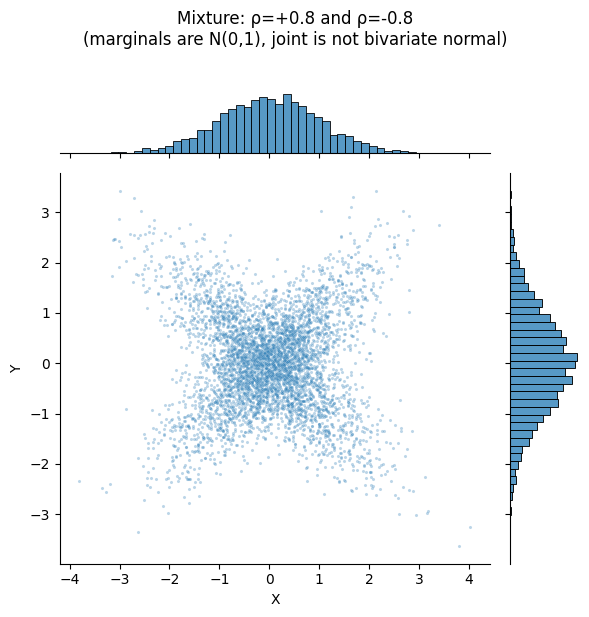

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42)
n = 5000

# Mixture of two bivariate normals: ρ=+0.8 and ρ=-0.8
rho1, rho2 = 0.8, -0.8

# Sample from first component (ρ = +0.8)
cov1 = [[1, rho1], [rho1, 1]]
xy1 = np.random.multivariate_normal([0, 0], cov1, n // 2)

# Sample from second component (ρ = -0.8)
cov2 = [[1, rho2], [rho2, 1]]
xy2 = np.random.multivariate_normal([0, 0], cov2, n // 2)

# Combine
xy = np.vstack([xy1, xy2])

# Joint plot with marginal histograms
g = sns.jointplot(x=xy[:, 0], y=xy[:, 1], kind='scatter', alpha=0.3, s=5)
g.ax_joint.set_xlabel('X')
g.ax_joint.set_ylabel('Y')
g.figure.suptitle('Mixture: ρ=+0.8 and ρ=-0.8\n(marginals are N(0,1), joint is not bivariate normal)', y=1.02)
plt.tight_layout()
plt.show()

Ok helpful. The model you used could arise if I had two binormal 2D populations (with the two different $\rho$'s), but I didn't understand the difference and thought of them as one population (or I did understand but didn't care). It's not different than a 1D bi-modal - there's some case or regime variable that sets which of the two modes "pertains" to a given realization and if you don't understand that you just are surprised to find two modes and it starts you wondering what's going on.  

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Exactly. And that's precisely the financial relevance: the "regime variable" might be "crisis vs. calm" or "risk-on vs. risk-off." In one regime assets move together (ρ > 0), in another they hedge each other (ρ < 0). Pool the data naively and you see ρ ≈ 0 overall — which badly misrepresents both regimes.

This is the danger lurking behind Chris's 2008 copula warning: if your model assumes a single stable correlation structure but reality switches regimes, your risk estimates can be catastrophically wrong right when it matters most.

Maybe. But now back to the less dramatic case of bi-Student-t from two normals - what mechanism in stocks could produce that kind of relationship? Actually it doesn't need to be two normals, does it? Any two stocks, even fictional "uniform distribution" returns, can be jointly student-t? Is that what copulas are?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Yes, that's exactly what copulas are. Sklar's theorem says you can decompose any joint distribution into:

1. **Marginals** — each variable's own distribution (can be anything: normal, uniform, whatever)
2. **Copula** — the dependence structure, separate from the marginals

And you can mix and match: take any marginals you like, glue them together with any copula you like, and you get a valid joint distribution.

So yes — two uniform marginals joined with a Student-t copula is perfectly legal. Or two normals with a Student-t copula. The copula captures *how* the variables move together, independent of what their individual shapes are.

The financial intuition for Student-t copula vs. Gaussian copula: **tail dependence**. A Gaussian copula says "extreme events are basically independent" — if X has a 4σ day, that tells you little about Y being extreme. A Student-t copula says "extremes cluster" — when one blows up, the other is more likely to blow up too.

Which do you think real markets exhibit?

### 3.2 Copulas

A *copula* is the joint distribution of random variables,  $\{U_i\}_{i=1}^N$ , each of which is uniformly distributed on  $[0, 1]$ . We say that a univariate random variable is uniformly distributed on  $[0, 1]$  if

$$\mathbb{P}(U\le x)=x \tag{3.15}$$

for  $x\in[0,1]$ , and denote this by  $U\sim U([0,1])$ . Clearly in this case,  $F_U(x)=x$ , and the probability density is simply  $f_U(x)=1$. We will denote a copula by $C$ , and based on the above, we must have

$$C(u_1,\dots,u_N)=\mathbb{P}(U_1\le u_1,\dots,U_N\le u_N). \tag{3.16}$$

Ok this is my second time reading this (the first time, I tried an exercise later on and found I had this all backward.) The copula is the joint distribution of a bunch of *unit-uniform* random variables. Whatever marginals we want to assume or impose are _not_ part of the copula definition, it seems. 

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Exactly right. The copula lives in the "probability space" — all variables squashed to [0,1] via their CDFs. It captures *pure dependence structure*, divorced from any particular marginal shape.

To build a full joint distribution, you:
1. Pick a copula C (the dependence structure)
2. Pick marginals F₁, F₂, ... (each variable's individual distribution)
3. Transform: X_i = F_i⁻¹(U_i)

The inverse CDF "stretches" the uniform back into whatever shape you want. The copula never knew or cared what those marginals would be.

Does that click with what tripped you up the first time?

Totally. Ok. The copula abstracts the jointness-bit out of the joint distribution. 

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Perfectly put. The copula *is* the jointness-bit, isolated.

And that's why it's such a powerful (and dangerous) tool: you can impose whatever dependence structure you want, and it will "work" mathematically with any marginals. But if you pick the wrong copula — say, Gaussian when reality has fat-tailed co-movement — your model will badly underestimate joint extreme events.

Ready to see how Chris formalizes this with Sklar's theorem?

How do you know he's about to use Sklar's? That in fact is the next message after this one, but I thought your context extends only to this point. 

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Good catch! I wasn't peeking ahead — Sklar's theorem was already mentioned back in section 3.1.1 (the note on correlation and independence), where Chris referenced it as the result that lets you construct any joint distribution from prescribed marginals.

Since we just hit the copulas section, it's the natural next step — Sklar's theorem *is* the theoretical foundation for copulas. Lucky guess, but an educated one.

Is there a way to use your tools to "peek ahead" if I ask you to?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Yes! I can use `find_msgs` or `view_dlg` to see all messages in the dialog, including ones below the current prompt. Just ask me to look ahead and I'll peek at what's coming.

As mentioned previously, *Sklar’s Theorem* states that for any random variables,  $\{X_i\}_{i=1}^N$  with marginals  $F_i(\cdot)$  and joint distribution  $F(\cdot)$ , there exists a copula,  $C$ , such that

$$F(x_1,\dots,x_N)=C\left(F_1(x_1),\dots,F_N(x_N)\right), \tag{3.17}$$

and that if the  $F_i$ ’s are unique, then so is  $C$ . This is a powerful result, but one that can be proven readily in the continuous case. We leave to the reader to prove the fact that

$$F_i(X_i)\sim U([0,1]). \tag{3.18}$$

Hold up this is key. But Chris tosses it off to the reader so my hunch is its a straightforward consequence of the definition of $F_i$ and of $X_i$ vs $x_i$. We want $$F_i(X_i)\sim U([0,1]).\tag{3.18}$$

By definition of a marginal distribution, $$F_i(x_i)=P(X_i<=x_i).$$

This seems like a trick, but from that definition, $$F_i(X_i)=P(X_i<=X_i)=1.$$

This is dumb. I guess it's not straighforward at least not initially to me. The intuition I'm groping to express is that $F_i$ is the transformation from the whole real line to the CDF, and $U([0,1])$ is the transformation of $[0,1]$ to the whole real line. 

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

You're close! The trap is that F_i(X_i) isn't a probability statement — it's a *new random variable* (a function of a random variable is a random variable).

Here's a nudge: Let Y = F(X). We want to find the distribution of Y by computing P(Y ≤ y).

Try writing out P(F(X) ≤ y) and see if you can massage it into something recognizable. (Hint: if F is strictly increasing, you can apply F⁻¹ to both sides of the inequality inside the probability.)

Ah that $F^{-1}$ is the transformation I was groping for. Ok. Before I continue what's the easiest (least-typing) syntax I can use here with KATEX to get an eqnarray or simple align-like list of "A=B \\=C \\=D"

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠

Use `\begin{aligned}` inside `$$`:

```latex
$$\begin{aligned}
A &= B \\
  &= C \\
  &= D
\end{aligned}$$
```

Let $Y=F(X)$. Then:  
$$\begin{aligned}
P(Y\le y)   &= P(F(X)\le y) \\
            &= P(F^{-1}(F(X))\le F^{-1}(y))\\
            &= P(X \le F^{-1}(y)).
\end{aligned}$$

Ok now I'm confused again. $F^{-1}(Y)=X$ by definition. But then I want to say $F^{-1}(y)=x$ but I can't honestly say I can explain why that's true, it just "looks right", uh, typographically. 

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

You don't need to name it x — just keep going! You have:

$$P(Y \le y) = P(X \le F^{-1}(y))$$

Now, what's the *definition* of F? It tells you P(X ≤ [something]) equals...?

Let's see. I know $F(x)=P(X<x)$. Then $F^{-1}(F(x))=F^{-1}(P(X<x))$, so $x=F^{-1}(P(X<x))$? But I think my problem is I don't really understand what $y$ is from $Y=F(X)$ so I don't have a clue what $F^{-1}(y)$ means. 

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Think of it simply: Y is a random variable, y is just a possible value it could take. Since F always outputs values in [0,1], we know y ∈ [0,1].

You've got P(Y ≤ y) = P(X ≤ F⁻¹(y)).

Now, the right side is P(X ≤ [some number]). What does the definition of F say that equals?

Ok. $F(x)=P(X<x)$ or equivalently $F(y)=P(Y\le y)$. So $P(Y\le y)=F(y)$. But I already had $P(Y\le y)=P(X\le F^{-1}(y))$. So, $F(y)=P(X\le F^{-1}(y))$. I'm trying to get to $P(F(X)<F(x)) ~ P(X<x)$? I keep coming back to defining $y$ ... if it's a possible value of Y, then can't I just define $y=F(x)$ for the mapped-through-F 'any possible value' of $X$? 

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

You're so close! Don't define y further — just apply the definition of F directly.

You have: P(X ≤ F⁻¹(y)) 

By definition of F, this equals F([the thing X is being compared to]). What's that thing?

$F(x)=P(X\le x)$. $P(Y\le y)=P(X\le F^{-1}(y))$. So I can say $F^{-1}(y)=x$ _only when_ I can say that $F(x)=P(Y\le y)$. But $P(Y\le y)=F(y)$. How am I not seeing this? I'm terrible at jigsaw puzzles too. 

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

You have: P(X ≤ F⁻¹(y))

Definition of F says: P(X ≤ z) = F(z) for any z.

Here z = F⁻¹(y). So P(X ≤ F⁻¹(y)) = F(F⁻¹(y)) = ?

$y$. Sigh. Ok: 

$F(X)=Y$. $P(Y\le y)=P(X\le F^{-1}(y))$. But $P(X\le z)=F(z)$ for any $z$. So $P(X\le F^{-1}(y))=F(F^{-1}(y))=y$. So $P(Y\le y)=y$. So Y is random uniform, and since $y$ must be on $[0,1]$, $Y$ is unit-uniform. Which means the distribution of $F(X)$ is unit uniform. 

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Exactly. That's the **probability integral transform** — push any continuous random variable through its own CDF and you get U[0,1]. 

And now Sklar makes sense: the copula lives in that uniform world, capturing pure dependence. To get back to your original variables, you just apply F⁻¹ to stretch each uniform marginal into whatever shape you want.

With this result in hand, we simply write the joint distribution in Sklar’s Theorem in terms of a copula,  $C$ , as

$$\begin{aligned} F(x_1,\dots,x_N)&=\mathbb{P}(X_1\le x_1,\dots,X_N\le x_N) \\ &=\mathbb{P}\left(F_1(X_1)\le F_1(x_1),\dots,F_N(X_N)\le F_N(x_N)\right) \\ &=\mathbb{P}\left(U_1\le F_1(x_1),\dots,U_N\le F_N(x_N)\right) \\ &=C\left(F_1(x_1),\dots,F_N(x_N)\right). \end{aligned}$$

For a specified,  $F(\cdot)$ , then, and continuous,  $F_i(\cdot)$ , we may construct a copula as

$$C\left(u_1,\dots,u_N\right)=F\left(F_1^{-1}(u_1),\dots,F_N^{-1}(u_N)\right). \tag{3.19}$$

The above result says that if we so desire, we may divorce the joint and marginal densities because the linking may be done entirely through some copula. Or, as so happens in practice, we may specify marginal distributions and a joint distribution separately.

**Example 3.2.1.** Let  $X_1$  and  $X_2$  be distributed as standard normal random variables, and let  $St_{\mu,\Sigma;\nu}(\cdot)$  be the joint distribution of a two dimensional Student  $t$  distribution with  $\nu$  degrees of freedom. Then

$$C(u_1, u_2) = St_{\mu,\Sigma;\nu}(\Phi^{-1}(u_1), \Phi^{-1}(u_2))$$

or

$$C(\Phi(x_1), \Phi(x_2)) = St_{\mu,\Sigma;\nu}(x_1, x_2)$$

exhibits a pair of random variables, jointly Student  $t$ , and with marginals that are standard normal.

Even more, for ellipsoidal distributions, we may focus solely on correlation, disregarding both position and scale; i.e., expectation and variance. This is due to the fact that copula’s have a so-called *rank-invariant property*, namely, if  $g_i(\cdot)$  are each strictly increasing functions

$$g_i: \mathbb{R} \mapsto \mathbb{R},$$

for  $i = 1, \dots, N$ , and  $C$  is the copula of  $\{X_i\}$  as in (??), then  $C$  is also the copula of  $\{g_i(X_i)\}$ .

Proof. Let  $F(\cdot)$  be the joint distribution function of  $X$ , a multivariate random variable and  $g_i(\cdot)$  strictly increasing functions from  $\mathbb{R}$  to  $\mathbb{R}$ . We know by the change of variable theorem (2.14), that the CDF of  $g_i(X_i)$  is

$$\tilde{F}_i(\cdot) = F_i \circ g_i^{-1}(\cdot) = F_i(g_i^{-1}(\cdot))$$

whose inverse is

$$\tilde{F}_i^{-1}(\cdot) = g_i \circ F_i^{-1}(\cdot) = g_i(F_i^{-1}(\cdot)).$$

Now, denoting the CDF of  $(g_1(X_1), \dots, g_N(X_N))'$  by  $F_g(\cdot)$ , we have

$$\begin{aligned} C(u_1, \dots, u_N) &= F(F_1^{-1}(u_1), \dots, F_N^{-1}(u_N)) \\ &= \mathbb{P}(X_1 \le F_1^{-1}(u_1), \dots, X_N \le F_N^{-1}(u_N)) \\ &= \mathbb{P}(g_1(X_1) \le g_1(F_1^{-1}(u_1)), \dots, g_N(X_N) \le g_N(F_N^{-1}(u_N))) \\ &= F_g(g_1(F_1^{-1}(u_1)), \dots, g_N(F_N^{-1}(u_N))). \end{aligned}$$

The result of this property is that we may strictly consider correlation structures when modeling ellipsoidal joint distributions via a copula rather than covariance structures; consider

$$g_i: X_i \mapsto \frac{X_i - \mu_i}{\sigma_i}$$

for finite mean and standard deviation,  $\mu_i$  and  $\sigma_i$ .

**Example 3.2.2.** Revisiting the example of random variables, jointly Student  $t$ , with standard normal marginals, we may use the preceding result to write

$$\begin{aligned}C(u_1, u_2) &= St_{\mu, \Sigma; \nu}(\Phi^{-1}(u_1), \Phi^{-1}(u_2)) \\&= St_{0, R; \nu}\left(\frac{\Phi^{-1}(u_1) - \mu_1}{\sigma_1}, \frac{\Phi^{-1}(u_2) - \mu_2}{\sigma_2}\right)\end{aligned}$$

for  $R$  the correlation matrix obtained from  $\Sigma$.

![](fig/3.4.png)
Figure 3.4: Simulated joint distributions using a copula approach, assuming a multivariate normal distribution with correlation parameter ranging from -0.8, -0.2, 0.2, and 0.8, clockwise from upper left subplot. In each case, the marginal distribution is fixed.

![](fig/3.5.png)
Figure 3.5: Simulated marginal distributions fit to a Student  $t$  distribution with  $\nu = 5$  degrees of freedom. The marginals shown here were input into various copula functions in the preceding figure.

**Example 3.2.3.** In practice,  $F(\cdot)$  and marginals,  $\{F_i(\cdot)\}$  are determined *a priori*; i.e., in a manner fixing a model. Oftentimes, copulas are used to simulate data with these prescribed distributions. Here, we look at a simple case of simulating jointly normal data with Student  $t$  marginals. Specifically, let

$$X_1 \sim St(\mu_1, \sigma_1^2; 5)$$
$$X_2 \sim St(\mu_2, \sigma_2^2; 5),$$

and let  $F(X) = \Phi_{\mu, \Sigma}$ . We know from the above that, without loss of generality, we may construct our copula function  $C(u_1, u_2) = F(F_1^{-1}(u_1), F_2^{-1}(u_2))$ ; or, if we would like, directly from the correlation matrix.

Since the joint distribution is assumed to be normal, we may first simulate  $N \times 2$  independent samples from a standard normal random variable to obtain a matrix  $\hat{Z}_0 \in \mathbb{R}^{N \times 2}$ . We know from previous work that

$$\hat{Z} = \Lambda \hat{Z}_0$$

will then be sampled according to  $N(0, \Sigma)$  when  $\Sigma = \Lambda \Lambda'$ . Notice that each column of  $\hat{Z}$  is sampled according to a standard normal. Letting  $\hat{Z}_i$  be the  $i$ th column of  $\hat{Z}$ , we set

$$\hat{U}_i = \Phi(\hat{Z}_i)$$

with evaluation occurring componentwise. From the above, each  $\hat{U}_i$  is now sampled according to a uniform random variable on  $[0, 1]$  with the joint distribution

specified by  $F(\cdot)$ . Taking inverses of the sampled uniform distributions, then,

$$\hat{X}_1 = St_{\mu_1, \sigma_1^2; 5}^{-1}(\hat{U}_1)$$
$$\hat{X}_2 = St_{\mu_2, \sigma_2^2; 5}^{-1}(\hat{U}_2),$$

we obtain our desired result: each of  $X_1$  and  $X_2$  has a Student  $t$  distribution with specified mean and variance, and the joint distribution is multivariate normal with correlation specified by  $\Sigma$ .

Figure 3.4 shows the isocontours of various joint distributions, with correlation varying over -0.8, -0.2, 0.2, and 0.8. In each case, the marginals are sampled from the same distribution. Representative histograms are shown in Figure 3.5.

Copulas are capable of modeling a considerable amount of information more than simple correlation. Even so, the applications that dominate the field involve using copula models to imbue marginal distributions with a given correlation structure. As our primary focus is on ellipsoidal distributions, their introduction within the chapter on covariance is not an accident and is in line with the view of most market practitioners.

The copula approach found wide appeal in credit derivatives markets due to a paper published by David Li in the Journal of Fixed Income [21]. *On Default Correlation: A Copula Function Approach* modeled default correlation in a novel way, linking marginal default risks obtained from credit default swap (CDS) pricing through a copula with a very simple structure to imply a joint distribution of credit defaults. The copula that became widely used and whose parameter eventually became a quoted market price was a multivariate normal copula with a covariance (correlation) matrix given by

$$\begin{pmatrix} 1 & \rho & \dots & \rho \\ \rho & 1 & \dots & \rho \\ \vdots & & \ddots & \\ \rho & \dots & \dots & 1 \end{pmatrix}.$$

Much like the versions of the Capital Asset Pricing Model we have seen already, the above model does two things: it provides a simplification of market relationships via market pricing and normative relationships, and produces an interpretable parameter.

Li's formula, however, is far more dangerous than Merton or Sharpe's. The model above, here told in generalities, but a rigorous treatment is not too much more involved, was used to estimate probabilities of joint defaults within pools of hundreds or even thousands of loans. The constant pairwise correlation is concerning, but the use of the normal distribution is even more so. Our previous analysis of the inability of the normal distribution to capture market extremes is apropos here as well.

The ease of implementation lead to this copula-based model here being used to mint huge numbers of triple-A rated bonds (made up from tiered levels of

pools of bonds). The pooled bonds were known as collateralized debt obligations, or CDOs. Concurrent with the acceptance of the modeling above, the CDO market grew from &#36;275 billion in 2000 to &#36;4.7 trillion in 2006.

Not only are correlations unstable (as we have already seen) and extreme events terribly likely, the CDO market (because of such great ratings by the ratings agencies) saw massive leverage. This was a recipe for disaster and culminated in the financial crisis of 2008. There were many people who could see this train-wreck coming far before it occurred, but in large part, the market did not. In effect, the market wasn’t efficient at pricing pairwise correlations; or, even worse, systemic crashes.

Li has apparently been unavailable for comment since the crisis.

Even with the above cautionary tale, we maintain that the powerful capability of modeling joint and marginal distributions separately is incomparable. Again, our emphasis is on interpretation and empiricism rather than on normative modeling.

As such, we may propose uses for the copula approach along the lines of Meucci [24], suggesting to use a joint Student *t* copula with five degrees of freedom and flexible marginals, or various panic copulas which reflect the stylized features of asymmetry and increased correlation in a crisis we have noted previously. Such additions are not merely refinements to the approach presented in Li’s paper, but well thought out and natural implementations of a flexible model in a market with a few known attributes. The copula modeling approach – much like the percentile modeling in VaR and CVaR interpretations of risk – allows the practitioner to articulate a wide variety of views. As such, its maligned history will likely be short.

"As such, its maligned history will likely be short", as in, it won't continue to be maligned for long? Chris seems to have a lot of faith in society's ability to let go of its simplifications in the face of careful analysis. I don't so much. So I'm not sure the reputation of copula modeling is likely to turn around anytime soon. But I guess the longer it remains maligned the longer there's an opportunity for Chris's readers to profit from it. 

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Ha — yes, that's a nicely contrarian read. The very inefficiency Chris warns against (markets mispricing risk) applies recursively: if practitioners over-correct by abandoning copulas entirely, those who use them *carefully* — with fat-tailed copulas, regime awareness, skepticism about correlation stability — have an edge.

The tool didn't fail in 2008. The *assumptions baked into a specific, dangerously simple copula* failed. Blaming "copulas" is like blaming "models" or "math."

But you're right that nuance rarely wins in public memory. "Gaussian copula killed the economy" is a much stickier story than "a single-parameter constant-correlation Gaussian copula, misapplied to illiquid credit derivatives with no stress testing, contributed to a crisis."

### 3.3 Eigenvalues

We may further analyze the structure of the covariance matrix by studying its *eigenvalues and eigenvectors*. Recall that for a square matrix,  $A\in\mathbb{R}^{N\times N}$ , the scalar  $\lambda$  is an eigenvalue if

$$Av=\lambda v. \tag{3.20}$$

Ok I need to review. There's a set of eigenvectors, $n$ of them (rank deficiency aside), which make a spanning set ... remind me how this goes in terms of projection? $A\nu$ is ... what again?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

For a symmetric matrix like Σ, the eigenvectors {eᵢ} form an orthonormal basis. Any vector x can be decomposed:

$$x = \sum_i c_i e_i \quad \text{where } c_i = e_i'x \text{ (the projection of } x \text{ onto } e_i\text{)}$$

Then applying A:

$$Ax = \sum_i c_i A e_i = \sum_i c_i \lambda_i e_i$$

So A just scales each component by its eigenvalue. The eigenvectors are the "natural coordinates" for A — in that basis, A is diagonal.

Does that reconnect things, or do you want to dig into a specific part?

I'm not as quick as I used to be. Please give me a 3x3 non-diagonal example. I don't need to be able to "see" the eigenvectors in the example, I'll take your word for it what they are, just show me the projections. 

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Let's use:

$$A = \begin{pmatrix} 2 & 1 & 0 \\ 1 & 2 & 0 \\ 0 & 0 & 1 \end{pmatrix}$$

Eigenvalues and (normalized) eigenvectors:
- λ₁ = 3, e₁ = (1, 1, 0)/√2
- λ₂ = 1, e₂ = (1, −1, 0)/√2  
- λ₃ = 1, e₃ = (0, 0, 1)

Take x = (3, 1, 2). Project onto each eigenvector:
- c₁ = e₁'x = (3+1)/√2 = 2√2
- c₂ = e₂'x = (3−1)/√2 = √2
- c₃ = e₃'x = 2

Reconstruct: x = c₁e₁ + c₂e₂ + c₃e₃ = (2,2,0) + (1,−1,0) + (0,0,2) = (3,1,2) ✓

Now apply A — just scale each component by its eigenvalue:

Ax = 3·(2,2,0) + 1·(1,−1,0) + 1·(0,0,2) = (6,6,0) + (1,−1,0) + (0,0,2) = **(7, 5, 2)**

You can verify: 2·3+1·1 = 7, 1·3+2·1 = 5, 1·2 = 2. ✓

In this case, we say that the nonzero vector, *v*, is the eigenvector associated with  $\lambda$ . Notice that if *v* is an eigenvalue, then a scalar multiple, *cv*, satisfies

$$A(cv)=cAv=c\lambda v=\lambda(cv),$$

and hence we may assume without loss of generality that  $||v||=1$ .

Eigenvalues may be determined by considering that if

$$Av=\lambda v,$$

then

$$(A-\lambda I)v=0$$

where  $I$  is the identity matrix. This implies, then, that  $A - \lambda I$  is singular (i.e., it affords a nonzero solution to the above), and hence its determinant must be zero:

$$\det(A - \lambda I) = 0. \quad (3.21)$$

Equation (3.21) is known as the *characteristic equation*, and is a polynomial of degree  $N$ . We know that in  $\mathbb{C}$  such an equation will surely have all of its roots. We are interested in the case where all of the eigenvalues are real, and positive definiteness (even semidefiniteness) is a sufficient condition for just such a result. We will denote that  $A$  is positive definite by

$$A \succ 0$$

and positive semidefinite by

$$A \succeq 0.$$

**Theorem 3.3.1.** The eigenvalues of a positive semidefinite real matrix,  $A \succeq 0$ , are real and nonnegative. If  $A \succ 0$ , then the eigenvalues are strictly positive.

Proof. Let  $A \succeq 0$ , and let  $v$  be a (nonzero) eigenvector with associated eigenvalue  $\lambda$ . We have immediately that

$$Av = \lambda v,$$

and, premultiplying both sides by  $v'$ , we get

$$v'Av = \lambda v'v = \lambda.$$

Now, since  $A \succeq 0$ , the left hand side is nonnegative, and hence so is  $\lambda$ . The case where  $A \succ 0$  follows identically, resulting in strictly positive  $\lambda$ .

We have already seen that the covariance matrix,  $\Sigma$ , of the real valued multivariate random variable  $X$  is positive semidefinite; viz., for  $Y = w'X$ ,

$$\mathrm{Var}(Y) = w'\Sigma w.$$

A necessary and sufficient condition for  $\Sigma$ , then, is to ensure that the variance of  $Y$  is nonzero; i.e., that it is not the case that there exists a linear combination

$$\sum_{i=1}^{N} w_i X_i$$

that is zero in the quotient space of random variables identifying constants. In this case, we say that  $\{X_i\}_{i=1}^N$  is linearly independent. We have then that  $\Sigma = \mathrm{Cov}(X)$  is positive definite if and only if  $\{X_i\}_{i=1}^N$  is linearly independent.

Notice that in our previous work on the multivariate normal and Student  $t$  distributions, an implicit assumption was that  $\Sigma$  was invertible. We now may formulate this condition based on the linear independence of the components of  $X$ .

In a financial context, we may interpret an eigenvector,  $e_i$ , as a vector of portfolio weights or positions. Consider,

$$\begin{aligned}Var(e'_i X) &= e'_i \Sigma e_i \\ &= \lambda_i e'_i e_i \\ &= \lambda_i.\end{aligned}$$

So that  $\lambda_i$  is exactly the variance of the portfolio with positions  $e_i$ . We call

$$e'_i X \tag{3.22}$$

the  $i$ th principal component of  $X$ , and will often refer to both  $e_i$  and  $e'_i X$  as an *eigenportfolio*. The relative size of each eigenvalue is surprisingly meaningful and related to this observation and aids in problems of dimension reduction.

Wait I missed what $X$ represents. Is it further above in the reading?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Yes — X ∈ ℝᴺ is the random vector of returns for N assets. So Xᵢ is asset i's return, and Σ = Cov(X) is the N×N covariance matrix.

Then eᵢ'X is the return of a portfolio with weights given by eigenvector eᵢ — that's the "eigenportfolio."

So $w'X$ is the return for any weighting $w$ of the securities, and we're interested in the weightings described by the eigenvectors of the covariance matrix of the returns of those securities, $w=e_i$. 

Why?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Two reasons:

1. **They're uncorrelated**. The eigenportfolios eᵢ'X and eⱼ'X (i ≠ j) have zero covariance. So they represent independent "bets" — the natural orthogonal decomposition of market risk.

2. **They're variance-ranked**. Each eigenportfolio has variance = its eigenvalue. So e₁ (largest λ) captures the most variance in the market — empirically, this is "the market factor." Smaller eigenvalues capture progressively less.

This is PCA applied to returns: you're finding the directions that explain the most (and least) variance. The first few eigenportfolios often map to interpretable things (market, sectors). The tiny-eigenvalue ones are noise, as we discussed earlier.

Does that answer the "why," or do you want to see the math showing they're uncorrelated?

It's starting to gel. $e_1$ (largest $\lambda$) is most variance ... but the return of that eigenportfolio is arbitrary (or at least, situation-specific), right? $\lambda$ is the variance and it's _not_ the return, correct?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Correct. λᵢ is purely the variance of eigenportfolio i. The expected return is eᵢ'μ (where μ is the vector of asset expected returns) — a completely separate quantity.

The eigendecomposition is about covariance structure only. High λ means "this direction captures a lot of variance," not "this direction is profitable."

For a covariance matrix,  $\Sigma \in \mathbb{R}^{N \times N}$  with eigenvalues  $\{\lambda_i\}_{i=1}^N$  and associated eigenvectors  $\{e_i\}_{i=1}^N$  with

$$\lambda_1 \ge \cdots \ge \lambda_N \ge 0$$

we have that the eigenvectors of distinct eigenvalues are orthogonal; viz.,

$$e'_i e_j = 0$$

if  $\lambda_i \neq \lambda_j$ . To prove this, we note that

$$\Sigma e_i = \lambda_i e_i$$

and

$$\Sigma e_j = \lambda_j e_j$$

and so

$$\begin{aligned}e'_i \Sigma e_j &= \lambda_j e'_i e_j \\ e'_j \Sigma e_i &= \lambda_i e'_j e_i.\end{aligned}$$

Now  $e'_i \Sigma e_j = e'_j \Sigma e_i$  since  $\Sigma$  is symmetric. Therefore

$$\lambda_j e'_i e_j = \lambda_i e'_j e_i.$$

Similarly,  $e'_i e_j = e'_j e_i$ , giving

$$(\lambda_i - \lambda_j)e'_i e_j = 0.$$

Assuming that the eigenvalues of  $\Sigma$  are distinct, we may decompose the covariance matrix as

$$\Sigma = \sum_{i=1}^N \lambda_i e_i e'_i. \tag{3.23}$$

To see this, notice that

$$\begin{pmatrix} - & e_1 & - \\ \vdots & & \vdots \\ - & e_N & - \end{pmatrix} \begin{pmatrix} | & \cdots & | \\ e_1 & & e_N \\ | & & | \end{pmatrix} = \begin{pmatrix} e'_1 e_1 & \cdots & e'_1 e_N \\ \vdots & \ddots & \vdots \\ e'_N e_1 & \cdots & e'_N e_N \end{pmatrix} = I$$

by the orthogonality of eigenvectors of  $\Sigma$ . Now, for square matrices,  $A$  and  $B$  satisfying  $AB = I$ , we know (read: we leave to the reader) that  $BA = I$ . Hence

$$\begin{pmatrix} | & \cdots & | \\ e_1 & & e_N \\ | & & | \end{pmatrix} \begin{pmatrix} - & e_1 & - \\ \vdots & & \vdots \\ - & e_N & - \end{pmatrix} = I,$$

or

$$e_1 e'_1 + \cdots + e_N e'_N = I.$$

Finally, since

$$\Sigma e_i e'_i = \lambda_i e_i e'_i,$$

we have that

$$\begin{aligned} \Sigma &= \Sigma I \\ &= \Sigma \sum_i e_i e'_i \\ &= \sum_i \Sigma e_i e'_i \\ &= \sum_i \lambda_i e_i e'_i \end{aligned}$$

as desired.

As a result, utilizing the fact that the trace operator for a matrix is linear and the property that for square matrices  $A$  and  $B$ ,

$$\mathrm{tr}(AB) = \mathrm{tr}(BA),$$

we may relate the sum of variances of  $X$  to the sum of the eigenvalues of  $\Sigma$ . In particular, we have

$$\begin{aligned} \mathrm{tr}(\Sigma) &= \mathrm{tr} \left( \sum_i \lambda_i e_i e'_i \right) \\ &= \sum_i \lambda_i \mathrm{tr} (e_i e'_i) \\ &= \sum_i \lambda_i \mathrm{tr} (e'_i e_i) \\ &= \sum_i \lambda_i, \end{aligned}$$

or

$$\sum_i \sigma_i^2 = \sum_i \lambda_i. \tag{3.24}$$

We call  $\sum_i \lambda_i$  the *total variance* of  $\Sigma$ . In addition to relating the eigenvalues of  $\Sigma$  to the sum of variances, equation (3.24) also gives us a method for dimension reduction.

**Example 3.3.1.** Let  $X$  be an  $N$ -dimensional random vector representing the returns of  $N$  assets. For a threshold,  $\tau$ , with

$$0 < \tau \le 1$$

we may choose  $M$  eigenportfolios explaining  $\tau\%$  of the total variance by choosing the smallest  $M$  satisfying

$$\frac{\sum_{i=1}^M \lambda_i}{\sum_{i=1}^N \lambda_i} \ge \tau. \tag{3.25}$$

The related  $M$  eigenportfolios (or principal components),  $e'_i X$ , then comprise  $\tau\%$  of the total variance. This is especially effective for high dimensional  $X$  such as when considering the composition of the S&P 500, for example.

In Figure 3.3, an estimated covariance matrix was calculated monthly for a cross-section of the 50 largest stocks at the time by market cap. The covariance was calculated using 121 trailing weeks of returns. The largest  $N$  eigenvalues were chosen according to (3.25), with  $\tau = 80\%$ . A smoothed approximation, looking at the mean  $N_t$  for the trailing 18 months is shown as well.

Throughout, no more than 18 eigenportfolios were needed to explain more than 80% of the total variance. This is a significant decrease from the original dimension of 50. Additionally, the figure shows that there was a steeped decrease in the number of eigenportfolios ‘explaining the market’ from the financial crisis through 2015 – only rebounding from the lows sometime in 2011. This effect is likely related to the various Quantitative Easing programs initiated by the Fed at the time.

We may also ask how much of the total variance is explained by the eigenportfolio related to the largest eigenvalue. Figure 3.3 shows the time variation of the explanatory power of this eigenportfolio. We see again the significant upswing after the Financial Crisis, achieving levels of market coordination not seen in the preceding twenty years. While the adage that in a crisis correlations go to one is evidenced here (read the explanatory power of the largest eigenvalue increases significantly), the figure is also instructive, showing that the market is dynamic and that heretofore unseen influences like the Fed’s Qualitative Easing [12] can have significant and novel effects. However, we should note that these effects are interpretable – and perhaps even expected from the trained practitioner’s eye – using the mathematical edifice already in place and established here.

![](fig/3.6.png)
Figure 3.6: Plot of the number of eigenportfolios needed to account for 80% of total variance through time. Covariance is calculated using weekly returns over a trailing 121 week period with the largest 50 stocks by market cap evaluated monthly.

Carrying this type of reasoning further, one may posit that if a necessary (but clearly not sufficient) condition for a bear market downturn is an uptick in the explanatory power of the largest eigenvalue, a crisis post 2015 would require a break in the elevated levels seen since 2008. There is minor evidence of this in the figure as well.

Finally, we may look at the distribution of eigenvalues in a manner similar to our previous analysis of daily log returns for various stocks. Figure 3.3 shows the empirical density of the eigenvalues of the covariance matrix as before available on 12/31/2007. As with our discussion of the distribution of daily log returns, certain stylized features emerge.

Particularly, even with observations that are linearly independent, we see a peak of near-zero eigenvalues. In recent years, the tools of Random Matrix Theory (RMT) have been implemented in math finance to study this phenomenon. Authors like Bouchaud and Potters [4] present a methodology based on RMT to identify random, and hence noisy, eigenportfolios. Doing so seeks to modify the covariance (correlation) matrix to eliminate eigenportfolios with erroneously low contributions to risk. This effect is particularly important when considering mean-variance optimization.

![](fig/3.7.png)
Figure 3.7: Plot of the percentage of total variance explained by the eigenportfolios associated with the largest eigenvalue through time. Covariance is calculated using weekly returns over a trailing 121 week period with the largest 50 stocks by market cap evaluated monthly.

In addition to a large bulk of eigenvalues clustering around zero, we also note one very large eigenvalue – in this case, 2,745 times larger than the smallest eigenvalue, and 3.80 times larger than the second largest eigenvalue. This eigenvalue is documented as related to the market portfolio as in Avellaneda [1], but we cannot replicate these claims. However, we do note that the eigenportfolio for this eigenvalue very often has all positive entries (or, more accurately since eigenvectors are scalar independent, all entries share the same sign).

The covariance structure of equity returns, then, allows for a broad classification wherein the market is often driven by a dominant market portfolio, orders of magnitude larger than the smallest eigenvalue. This smallest eigenvalue, in turn, lies amongst a bulk of very near zero eigenvalues that may be classified in a technical sense as random noise. Further, the effects of the largest eigenvalue are interpretable in a dynamic sense, accounting for time specific features of the market as such.

![](fig/3.8.png)
Figure 3.8: Empirical histogram of the eigenvalues of the covariance matrix available on 12/31/2007. Covariance is calculated using weekly returns over a trailing 121 week period with the largest 50 stocks by market cap on that date.

All the above is "just PCA applied to market variance", yes?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Yes, exactly. PCA on returns = eigendecomposition of Σ. The eigenportfolios are the principal components, ranked by variance explained.

The finance framing just adds interpretation: the first PC is "the market," the next few are often sectors, and the bulk of tiny eigenvalues are noise. But the math is standard PCA.

### Exercises

1. Prove that for an inner product  $(\cdot, \cdot)$ , and for scalars  $\{a_i\}$  and  $\{b_j\}$ , and  $\{X_i\}$  and  $\{Y_j\}$  in  $V$ , we have

$$\left( \sum_i a_i X_i, \sum_j b_j Y_j \right) = \sum_i a_i \sum_j b_j (X_i, Y_j).$$

2. Verify that  $Cov(\cdot, \cdot)$  is symmetric and bilinear.

3. Prove that  $||\cdot||^2 = (\cdot, \cdot)$  defines a norm. In particular, this gives that variance is a norm on the quotient space of random variables.

4. Prove for univariate random variables  $X$  and  $Y$  with means  $\mu_X$  and  $\mu_Y$ , respectively, that

$$Cov(X, Y) = \mathbb{E}(XY) - \mu_X \mu_Y.$$

5. Using notation as in (2.43), show that

$$\hat{\sigma}_{XY} = \frac{1}{N-1} \sum_{i=1}^{N} (X_i - \hat{\mu}_X) (Y_i - \hat{\mu}_Y)$$

is an unbiased estimator of the covariance between  $X$  and  $Y$ .

6. For univariate random variables  $X$  and  $Y$ , and scalars,  $a$ ,  $b$ ,  $c$ , and  $d$ , if  $\text{Corr}(X, Y) = \rho$ , what is  $\text{Corr}(a + bX, c + dY)$ ?

7. Verify that  $f_U(x) = 1$  is the probability density function for uniformly distributed  $U$  on  $[0, 1]$ .

8. Use the change of variables theorem to determine the density for a uniformly distributed random variable on  $[a, b]$ .

9. Prove 3.18 for continuous  $F_i$  by looking at

$$\mathbb{P}(F_i(X_i) \le u)$$

for  $u \in [0, 1]$ .

10. Using the IBM/S&P daily return data, construct a copula function simulation with  $N = 1,000$  samples for the joint distribution of daily log returns where the joint distribution is Student  $t$  with five degrees of freedom with correlation matching the sample, and the marginals are also Student  $t$  with five degrees of freedom with means and volatilities matching the univariate sample means and standard deviations.

I don't want to do the parameter estimation, Chris probably gives the necessary marginal and joint parameters in the text. I just need to define variables with those distributions (that's the point of the problem) and then pull realizations from it. Let's start with this: please look up the parameter values I need from the text above. 

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

From Example 3.1.4:

- ρ̂ = 0.59
- σ̂_IBM = 0.0787
- σ̂_SPX = 0.0443

Means aren't explicitly given in the text. For daily log returns they're typically very small (near zero). Want to assume μ_IBM = μ_SPX = 0, or would you prefer to dig for explicit values?

Zero will do for now. A "copula function simulation" ... must mean specifying two marginals and a correlation structure, then a function that calls all 3 to return a realization. Is that correct?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Close, but the order is:

1. Sample from the copula (here, bivariate Student-t with ν=5 and ρ=0.59) → gives correlated uniforms (u₁, u₂) on [0,1]²
2. Transform each uniform through its marginal's inverse CDF → (F₁⁻¹(u₁), F₂⁻¹(u₂))

The copula handles the dependence; the inverse CDFs shape each marginal. The two steps are independent of each other — that's Sklar's theorem in action.

Does that structure make sense before we write it?

I had that totally backward. Which part of the chapter should I re-read to understand the implementation approach?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Example 3.2.3 — it walks through exactly this procedure: start with correlated normals, transform to uniform via Φ, then apply inverse marginal CDFs.

Ok I looked at that. Too much work to do it (took me long enough to wrestle with the simple left to the reader problem), but I get it now. The copula is "just" two random-uniform variables with whatever correlation we impose. We pick a value (a vector) from the joint distribution then run each component through its inverse marginal to get the vector in the population space. 

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Exactly right. The copula is pure dependence in [0,1]² space; the inverse marginals stretch it into whatever shapes you want. That's the whole trick.

Ready to move on to the next section, or any loose ends from Chapter 3?

11. Using the cross-sectional and historical return data, plot the percentage of positive components of the eigenvector associated with the largest eigenvalue of the covariance through time; i.e., for eigenvector  $e_t = (e_{1t}, \dots, e_{Nt})$  at time  $t$ , plot

$$m_{it} = \frac{1}{N} \sum_{i=1}^{N} \delta_i(e_t)$$

where

$$\delta_i(e) = \begin{cases} 1 & \text{if } e_i > 0 \\ 0 & \text{otherwise.} \end{cases}$$

Use the same methodology as in the chapter, choosing the largest 50 companies by market cap at each time, and using the full 121 weeks of returns available. Why can we assume without loss of generality that  $m_{it} > 0.5$ ?

I don't think I'm going to get the data to code this up, but on the last part of the question, I first have to ask if negative weights are short positions and a regular part of all this, or if eigenvector elements are always positive definite (so we're just distinguishing between 0 and non-zero). Assuming negative values are acceptable and routine, then the answer to the last question is that the case where $m_{it}$<.5$ is just the "short" version of $m_{it}>.5$. 

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Exactly right. Eigenvectors are only defined up to sign — if e is an eigenvector, so is −e. So if more than half the components are negative, just flip the whole vector and now more than half are positive.

That's the WLOG: you always choose the sign convention where the majority of components are positive (or equivalently, where the "market eigenportfolio" is net long). The m < 0.5 case is just the same eigenvector with the opposite sign convention.

12. Prove that for square matrices  $A$  and  $B$  that if

$$AB = I$$

then

$$BA = I.$$

13. Consider the model

$$r = \alpha + \beta r_m + \epsilon$$

with  $r$ ,  $r_m$ , and  $\epsilon$  univariate random variables,

$$(r_m, \epsilon) = \text{Cov}(r_m, \epsilon) = 0,$$

and

$$\mathbb{E}(\epsilon) = 0.$$

Show that

$$\beta = \frac{\text{Cov}(r, r_m)}{\text{Var}(r_m)}$$

and

$$\alpha = \mathbb{E}(r) - \beta \mathbb{E}(r_m).$$

14. Prove that if the matrix  $A$  has eigenvalues  $\{\lambda_i\}_{i=1}^N$ , then  $A^k$  has eigenvalues  $\{\lambda_i^k\}_{i=1}^N$ .

15. Let  $(\cdot, \cdot)_F$  be defined for matrices (of appropriate dimensions) by  $(A, B)_F = \text{tr}(A'B)$ .

(a) Show that  $(\cdot, \cdot)_F$  is an inner product.

(b) For a covariance matrix,  $\Sigma$ , what is  $\sqrt{(\Sigma, \Sigma)_F}$  in terms of the eigenvalues of  $\Sigma$ ?

16. For the Euclidean vector norm  $||\cdot||$ ,

$$||x|| = (x'x)^{\frac{1}{2}},$$

define the matrix norm  $||\cdot||_2$  by

$$||A||_2 = \max_{||v||=1} ||Av||. \quad (3.26)$$

(a) Show that

$$||A||_2 = \max \frac{||Av||}{||v||}.$$

(b) Show that for any vector  $z$ ,

$$||Az|| \le ||A||_2 ||z||.$$

(c) Show

$$||AB||_2 \le ||A||_2 ||B||_2$$

(d) Show that for a positive definite matrix  $A$ ,

$$||A||_2 = \lambda_{\max},$$

where  $\lambda_{\max}$  is the maximum eigenvalue of  $A$ .

Please read the context note at the top of this dialog, expand it to describe my learning in Chapter 3, and put the result at the top of ch_4.ipynb. 

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠



<details class='tool-usage-details'>
<summary>read_msgid(id=_9f6f38e9)</summary>

```json
{
  "id": "toolu_01SEwKCsvYnFKsuV9xfPcTK2",
  "call": {
    "function": "read_msgid",
    "arguments": {
      "id": "_9f6f38e9"
    }
  },
  "result": "{'id': '_9f6f38e9',\n 'time_run': '',\n 'is_exported': 0,\n 'skipped': 0,\n 'hidden': False,\n 'bookmark': {},\n 'i_collapsed': 0,\n 'o_collapsed': 0,\n 'heading_collapsed': False,\n 'i_clamp': False,\n 'o_clamp': False,\n 'pinned': 0,\n 'oob': {},\n 'order': 0,\n 'run': {},\n 'scroll': {},\n 'content': '# Context\\n\\nI\\'m Dan \u2014 trained in physical oceanography, experienced in state-space modeling, finite difference methods, and data science, but new to investment theory. I\\'m working through Chris Bemis\\'s *Portfolio Statistics and Optimization* (August 2023) to build understanding.\\n\\n**Book structure**: Cha<TRUNCATED>"
}
```

</details>

Now let me add the expanded context note to ch_4.ipynb:

<details class='tool-usage-details'>
<summary>add_msg(dname=ch_4, placement=at_start, content=# Context

I'm Dan — trained in physical oceanogra…)</summary>

```json
{
  "id": "toolu_01UnFVNMets94wvH3K4SeCff",
  "call": {
    "function": "add_msg",
    "arguments": {
      "dname": "ch_4",
      "placement": "at_start",
      "content": "# Context\n\nI'm Dan \u2014 trained in physical oceanography, experienced in state-space modeling, finite difference methods, and data science, but new to investment theory. I'm working through Chris Bemis's *Portfolio Statistics and Optimization* (August 2023) to build understanding.\n\n**Book structure**: Chapters are split into separate dialogs (ch_1.ipynb, ch_2.ipynb, etc.). Also available:\n- `./spoiler.md` \u2014 short digest of each chapter's point and how they form the book's arc\n- `./bib.ipynb` \u2014 bibliography\n\n**Arc**: The book builds from statistical foundations (distributions, covariance) through <TRUNCATED>"
    }
  },
  "result": "'_a546013a'"
}
```

</details>

Done. I've added the expanded context note to the top of ch_4.ipynb, now including a summary of Chapter 3: covariance as inner product, copulas and Sklar's theorem, eigendecomposition/PCA of covariance matrices, and the key insights about the market eigenportfolio and correlation instability.